In [79]:
!curl -L -o ./dataset/adult-income-dataset.zip https://www.kaggle.com/api/v1/datasets/download/wenruliu/adult-income-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

 30  652k   30  199k    0     0   156k      0  0:00:04  0:00:01  0:00:03  156k
100  652k  100  652k    0     0   434k      0  0:00:01  0:00:01 --:--:-- 2018k


## Import Bibliotecas

In [80]:
%pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [81]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


## Descompactar os datasets

In [82]:
with zipfile.ZipFile('./dataset/adult-income-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset/')

## Manipulação de dados

In [83]:
path_dataset = './dataset/adult.csv'

In [84]:
dataframe_original = pd.read_csv(path_dataset)
# Lista das colunas que quero remover
colunas_para_remover = ['fnlwgt','capital-gain','capital-loss']
# Remove as colunas da lista
dataframe_original = dataframe_original.drop(colunas_para_remover, axis=1)

# Cria uma cópia para processamento
dataframe = dataframe_original.copy()
print("Dataframe original carregado e cópia criada para processamento")
dataframe_original.head()

Dataframe original carregado e cópia criada para processamento


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [85]:
dataframe["educational-num"].value_counts()

educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

In [86]:
dataframe["native-country"].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [87]:
# Marque todas as linhas que estao com dados faltantes salva em um dataframe
def verificar_dados_faltantes(df):
    missing_data = df.isin(['?'])
    missing_rows = df[missing_data.any(axis=1)]
    return missing_rows, missing_data

In [88]:
missing_data = verificar_dados_faltantes(dataframe)[1]

In [89]:
(verificar_dados_faltantes(dataframe)[1]).sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [90]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   hours-per-week   48842 non-null  int64 
 10  native-country   48842 non-null  object
 11  income           48842 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [91]:
dataframe.describe()

,age,educational-num,hours-per-week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382
std,13.710510,2.570973,12.391444
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [92]:
## Tratamento de dados faltantes
for column in dataframe.columns:
    if missing_data[column].any():
        mode = dataframe[column].mode()[0]
        dataframe.loc[missing_data[column], column] = mode
dataframe

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [93]:
verificar_dados_faltantes(dataframe)[0]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['age', 'hours-per-week', 'educational-num']
dataframe[cols_to_scale] = scaler.fit_transform(dataframe[cols_to_scale])

print("StandardScaler aplicado para: age, hours-per-week, educational-num")
dataframe[cols_to_scale].head()

StandardScaler aplicado para: age, hours-per-week, educational-num


,age,hours-per-week,educational-num
0,-0.995129,-0.034087,-1.197259
1,-0.046942,0.772930,-0.419335
2,-0.776316,-0.034087,0.747550
3,0.390683,-0.034087,-0.030373
4,-1.505691,-0.841104,-0.030373


## Análise Exploratória

In [95]:
# Reorganizar os valores de educação em português
dataframe_original['education'] = dataframe_original['education'].replace({
    'Preschool': 'Pré-escola',
    '1st-4th': 'Fundamental Incompleto',
    '5th-6th': 'Fundamental Incompleto', 
    '7th-8th': 'Fundamental Incompleto',
    '9th': 'Fundamental Incompleto',
    '10th': 'Médio Incompleto',
    '11th': 'Médio Incompleto',
    '12th': 'Médio Incompleto',
    'HS-grad': 'Ensino Médio',
    'Some-college': 'Superior Incompleto',
    'Assoc-acdm': 'Tecnólogo',
    'Assoc-voc': 'Tecnólogo',
    'Bachelors': 'Superior Completo',
    'Masters': 'Mestrado',
    'Prof-school': 'Especialização',
    'Doctorate': 'Doutorado'
})

print("Valores de educação reorganizados em português:")
print(dataframe_original['education'].value_counts())

Valores de educação reorganizados em português:
education
Ensino Médio              15784
Superior Incompleto       10878
Superior Completo          8025
Médio Incompleto           3858
Tecnólogo                  3662
Mestrado                   2657
Fundamental Incompleto     2467
Especialização              834
Doutorado                   594
Pré-escola                   83
Name: count, dtype: int64


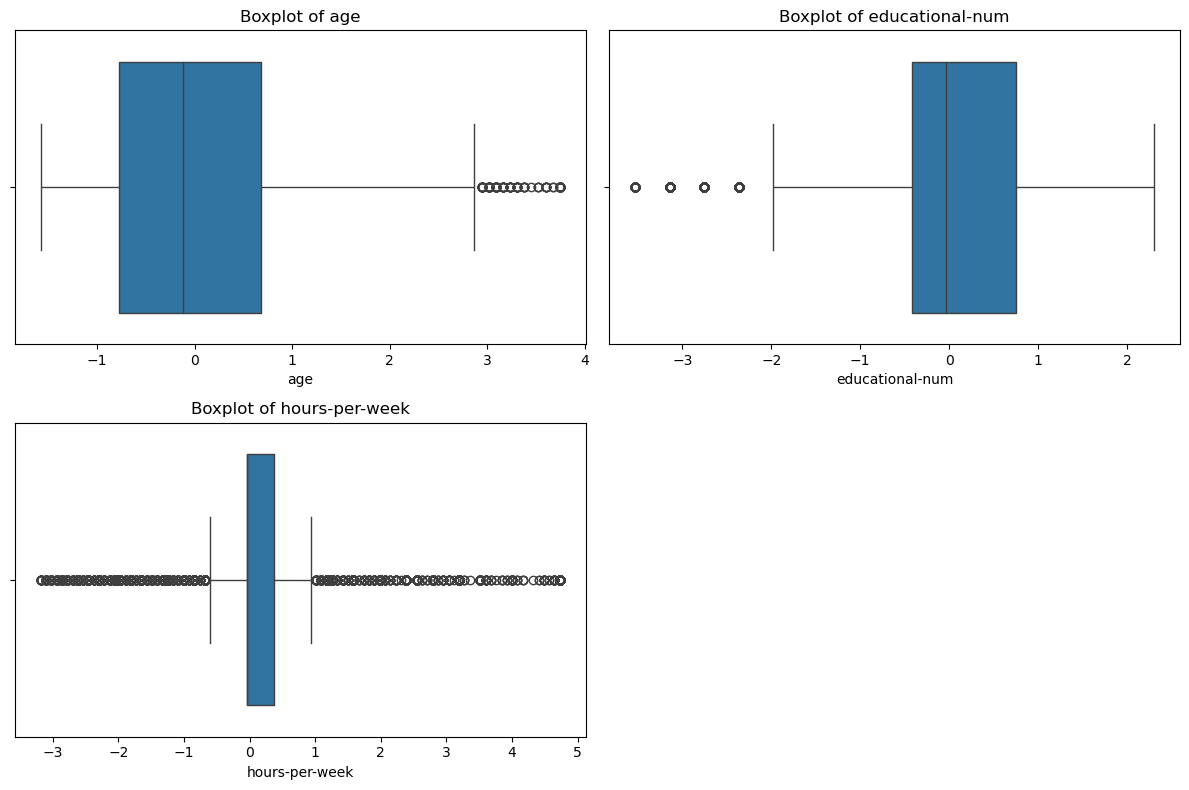

In [96]:
# Detecte e trate possíveis outliers.
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_columns)

# Calcular layout da grid
cols = 2
rows = (n_cols + cols - 1) // cols

plt.figure(figsize=(12, 4 * rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=dataframe[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

In [97]:
# Agrupar valores Income
dataframe['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

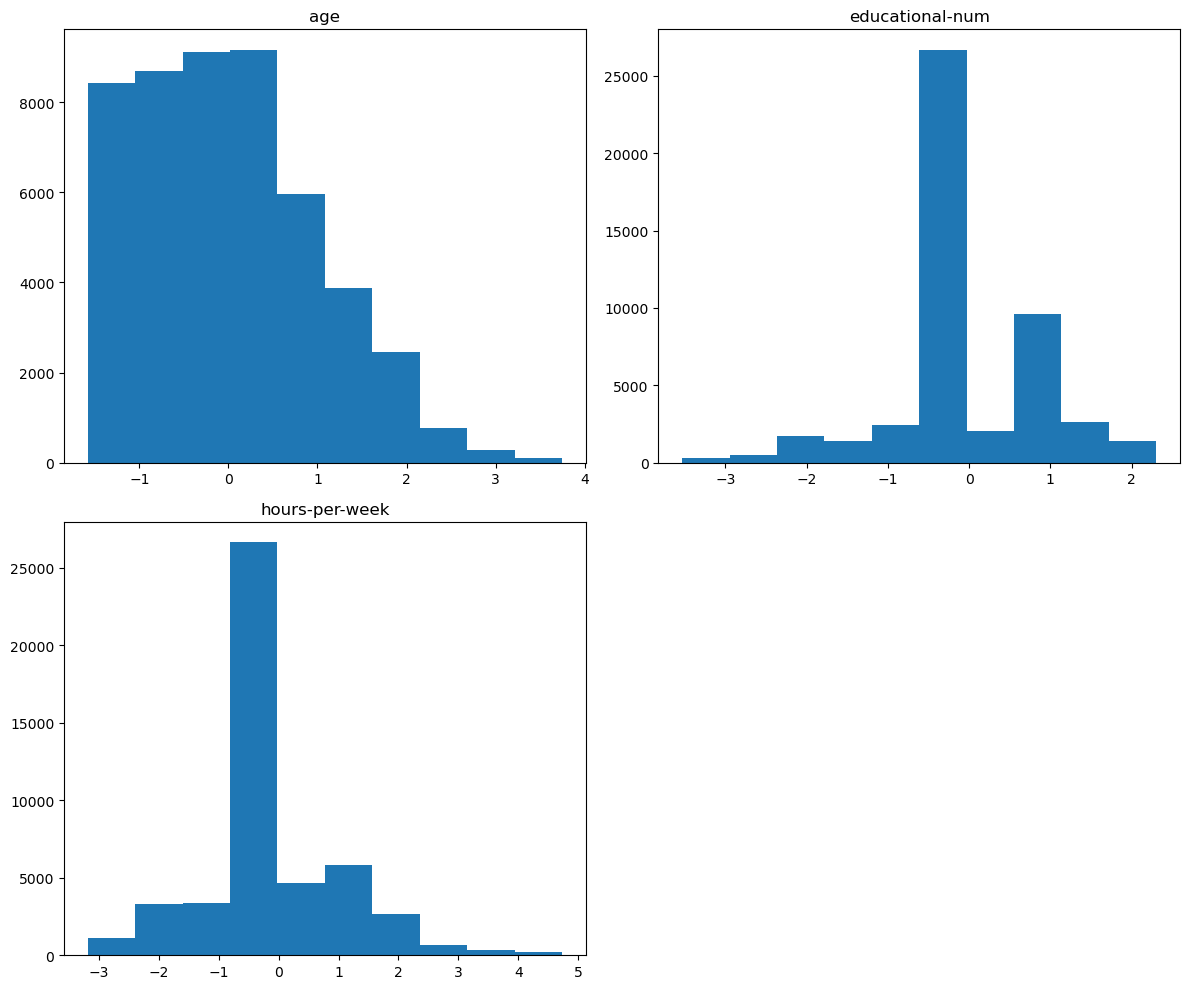

In [98]:
# Exibe o histograma de cada coluna
axarr = dataframe.hist(figsize=(12, 10))
plt.tight_layout()
for ax in axarr.flatten():
    ax.grid(False)

In [99]:
# Detectar e remover outliers usando IQR (Interquartile Range)
for column in dataframe.select_dtypes(include=[np.number]).columns:
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    print(f"Outliers em {column}: {len(outliers)} registros")
    
    # Substituir outliers pela mediana
    median_value = dataframe[column].median()
    dataframe.loc[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound), column] = median_value

Outliers em age: 216 registros
Outliers em educational-num: 1794 registros
Outliers em hours-per-week: 13496 registros


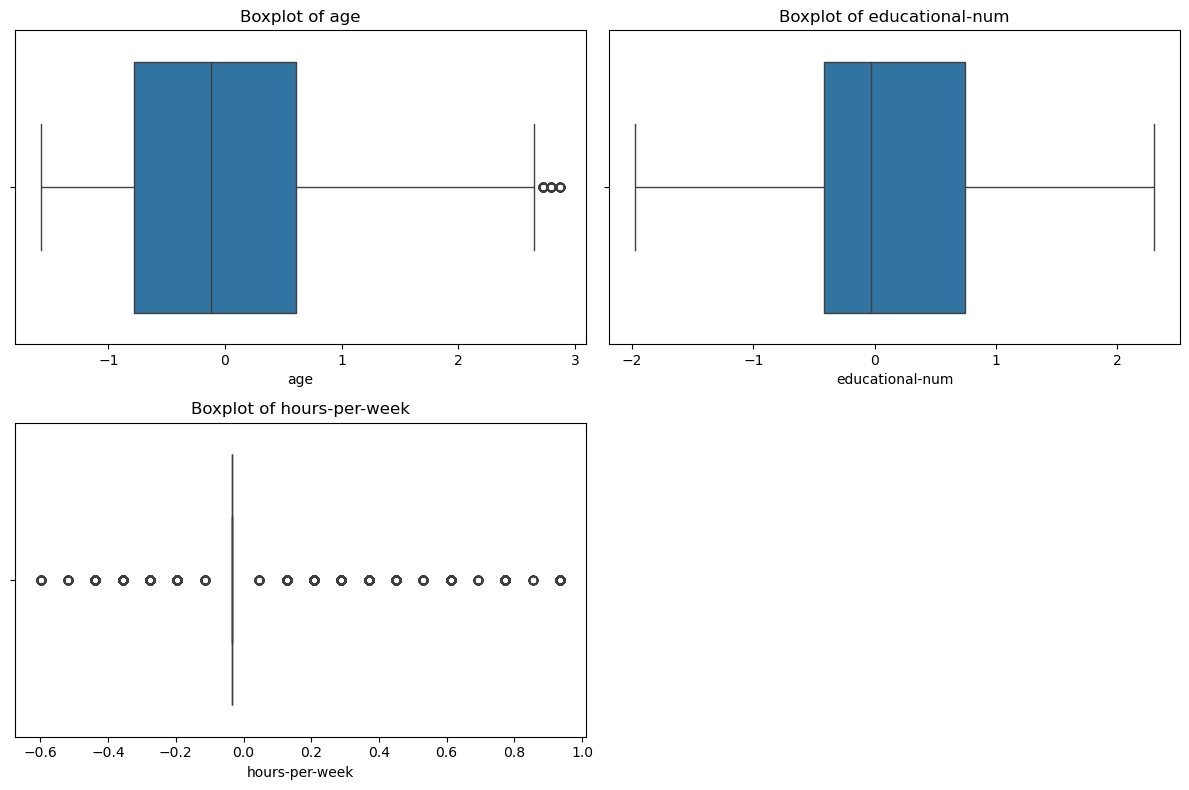

In [100]:
# Detecte e trate possíveis outliers.
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_columns)

# Calcular layout da grid
cols = 2
rows = (n_cols + cols - 1) // cols

plt.figure(figsize=(12, 4 * rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=dataframe[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()

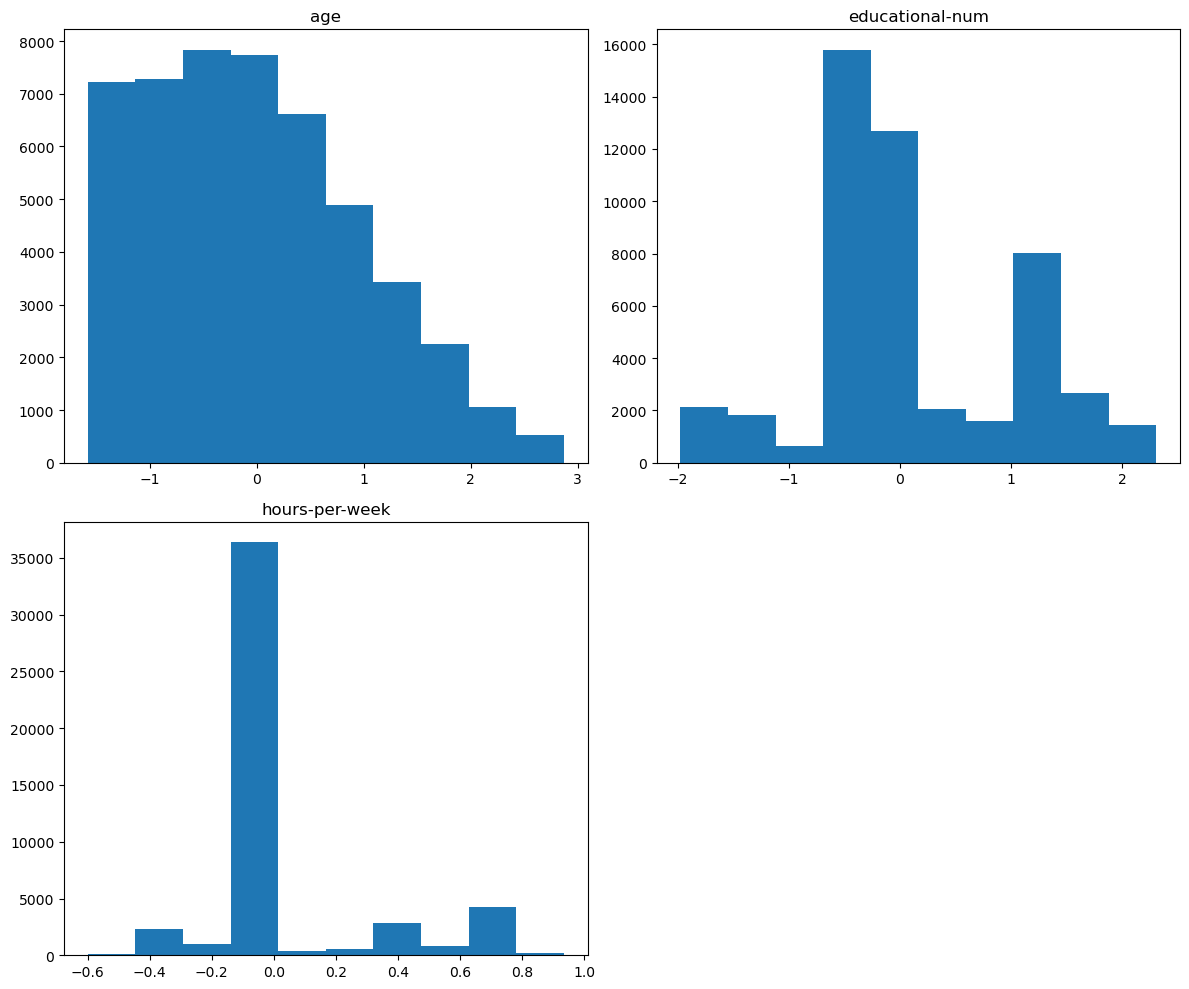

In [101]:
# Exibe o histograma de cada coluna
axarr = dataframe.hist(figsize=(12, 10))
plt.tight_layout()
for ax in axarr.flatten():
    ax.grid(False)

In [102]:
# Converte colunas categóricas em numéricas (apenas no dataframe de processamento)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in dataframe.columns:
    if dataframe[column].dtype == 'object':
        le = LabelEncoder()
        dataframe[column] = le.fit_transform(dataframe[column])
        label_encoders[column] = le
        
print("Codificação aplicada apenas ao dataframe de processamento")
print("Dataframe original mantém valores categóricos originais")
dataframe.head()

Codificação aplicada apenas ao dataframe de processamento
Dataframe original mantém valores categóricos originais


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,-0.995129,3,1,-1.197259,4,6,3,2,1,-0.034087,38,0
1,-0.046942,3,11,-0.419335,2,4,0,4,1,0.772930,38,0
2,-0.776316,1,7,0.747550,2,10,0,4,1,-0.034087,38,1
3,0.390683,3,15,-0.030373,2,6,0,2,1,-0.034087,38,1
4,-1.505691,3,15,-0.030373,4,9,3,4,0,-0.034087,38,0


In [103]:
dataframe.describe()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,-0.015050,3.099668,10.288420,0.095692,2.618750,6.152819,1.443287,3.668052,0.668482,0.057251,36.433664,0.239282
std,0.975582,1.110810,3.874492,0.855280,1.507703,3.968837,1.602151,0.845986,0.470764,0.281683,6.031536,0.426649
min,-1.578629,0.000000,0.000000,-1.975183,0.000000,0.000000,0.000000,0.000000,0.000000,-0.598999,0.000000,0.000000
25%,-0.776316,3.000000,9.000000,-0.419335,2.000000,3.000000,0.000000,4.000000,0.000000,-0.034087,38.000000,0.000000
50%,-0.119879,3.000000,11.000000,-0.030373,2.000000,7.000000,1.000000,4.000000,1.000000,-0.034087,38.000000,0.000000
75%,0.609496,3.000000,12.000000,0.747550,4.000000,9.000000,3.000000,4.000000,1.000000,-0.034087,38.000000,0.000000
max,2.870558,7.000000,15.000000,2.303397,6.000000,13.000000,5.000000,4.000000,1.000000,0.934333,40.000000,1.000000


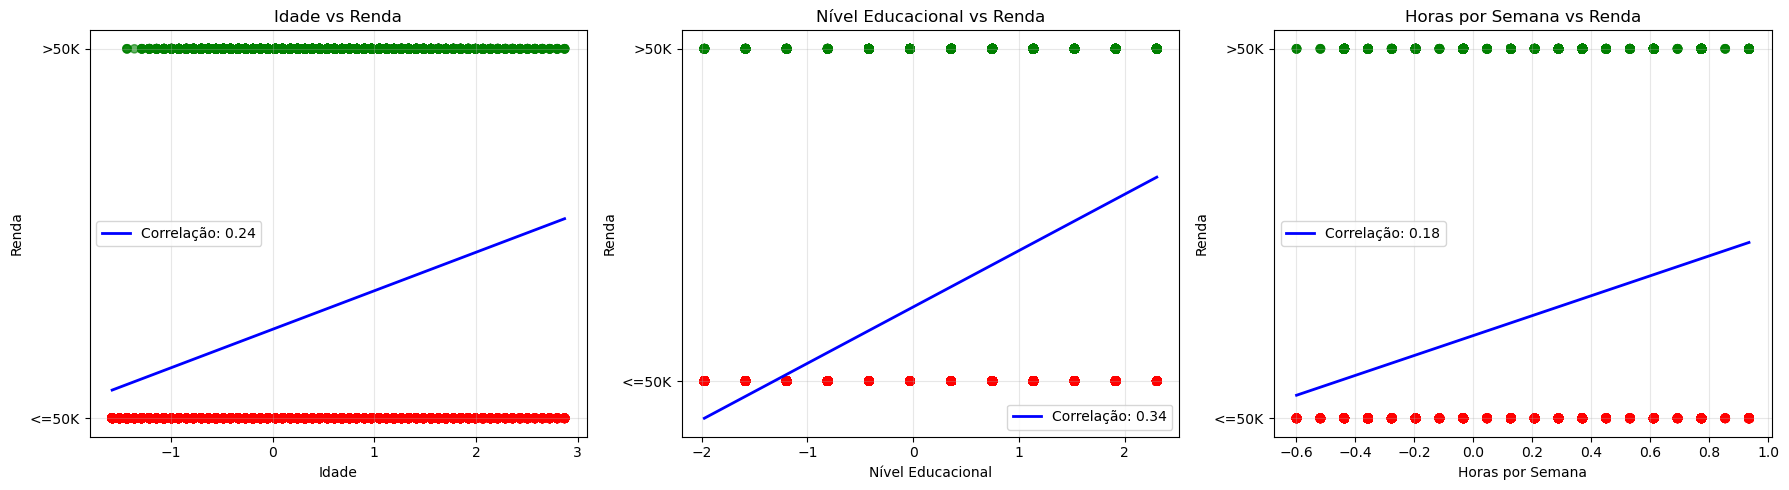

In [106]:

correlation_matrix = dataframe.corr()

df_dispersao = dataframe[['age', 'educational-num', 'hours-per-week', 'income']]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cores = {0: 'red', 1: 'green'}
labels = {0: '<=50K', 1: '>50K'}

# Gráfico 1: Age vs Income
axes[0].scatter(df_dispersao['age'], df_dispersao['income'], 
                c=df_dispersao['income'].map(cores), alpha=0.6, label=None)
# Linha de tendência
coef_age = np.polyfit(df_dispersao['age'], df_dispersao['income'], 1)
x_age = np.linspace(df_dispersao['age'].min(), df_dispersao['age'].max(), 100)
axes[0].plot(x_age, np.polyval(coef_age, x_age), color='blue', linewidth=2, label=f'Correlação: {correlation_matrix.loc["age", "income"]:.2f}')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Renda')
axes[0].set_title('Idade vs Renda')
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['<=50K', '>50K'])
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Educational-num vs Income
axes[1].scatter(df_dispersao['educational-num'], df_dispersao['income'], 
                c=df_dispersao['income'].map(cores), alpha=0.6, label=None)
coef_edu = np.polyfit(df_dispersao['educational-num'], df_dispersao['income'], 1)
x_edu = np.linspace(df_dispersao['educational-num'].min(), df_dispersao['educational-num'].max(), 100)
axes[1].plot(x_edu, np.polyval(coef_edu, x_edu), color='blue', linewidth=2, label=f'Correlação: {correlation_matrix.loc["educational-num", "income"]:.2f}')
axes[1].set_xlabel('Nível Educacional')
axes[1].set_ylabel('Renda')
axes[1].set_title('Nível Educacional vs Renda')
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['<=50K', '>50K'])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Hours-per-week vs Income
axes[2].scatter(df_dispersao['hours-per-week'], df_dispersao['income'], 
                c=df_dispersao['income'].map(cores), alpha=0.6, label=None)
coef_hours = np.polyfit(df_dispersao['hours-per-week'], df_dispersao['income'], 1)
x_hours = np.linspace(df_dispersao['hours-per-week'].min(), df_dispersao['hours-per-week'].max(), 100)
axes[2].plot(x_hours, np.polyval(coef_hours, x_hours), color='blue', linewidth=2, label=f'Correlação: {correlation_matrix.loc["hours-per-week", "income"]:.2f}')
axes[2].set_xlabel('Horas por Semana')
axes[2].set_ylabel('Renda')
axes[2].set_title('Horas por Semana vs Renda')
axes[2].set_yticks([0, 1])
axes[2].set_yticklabels(['<=50K', '>50K'])
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [107]:
# Normalizar dados de age apenas no dataframe de processamento
q = dataframe["age"].max() - dataframe["age"].min()
dataframe["age"] = (dataframe["age"] - dataframe["age"].min()) / q

print("Normalização aplicada apenas ao dataframe de processamento")
print(f"Idade original: {dataframe_original['age'].min()} - {dataframe_original['age'].max()}")
print(f"Idade normalizada: {dataframe['age'].min():.3f} - {dataframe['age'].max():.3f}")
dataframe["age"].head()

Normalização aplicada apenas ao dataframe de processamento
Idade original: 17 - 90
Idade normalizada: 0.000 - 1.000


0    0.131148
1    0.344262
2    0.180328
3    0.442623
4    0.016393
Name: age, dtype: float64

In [108]:
# verifique como variáveis como idade, escolaridade,
# horas de trabalho e ocupação influenciam na renda.
X = dataframe[dataframe.columns.difference(['income'])]
y = dataframe['income']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.426615
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48830
Method:                           MLE   Df Model:                           11
Date:                Wed, 03 Sep 2025   Pseudo R-squ.:                  0.2247
Time:                        14:25:47   Log-Likelihood:                -20837.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0571      0.120    -25.551      0.000      -3.292      -2.823
age           

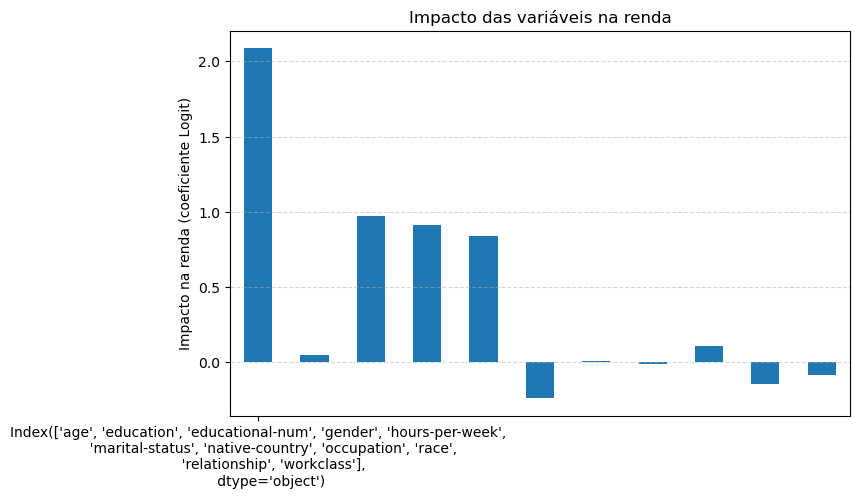

In [109]:
# Gráfico de barras dos coeficientes do modelo
nomes_coeficientes = [dataframe.columns.difference(['income'])]
coeficientes = model.params[1:]  # Ignora o intercepto

coeficientes.plot.bar(figsize=(8, 5))
plt.ylabel('Impacto na renda (coeficiente Logit)')
plt.title('Impacto das variáveis na renda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(ticks=range(len(nomes_coeficientes)), labels=nomes_coeficientes, rotation=0)
plt.show()

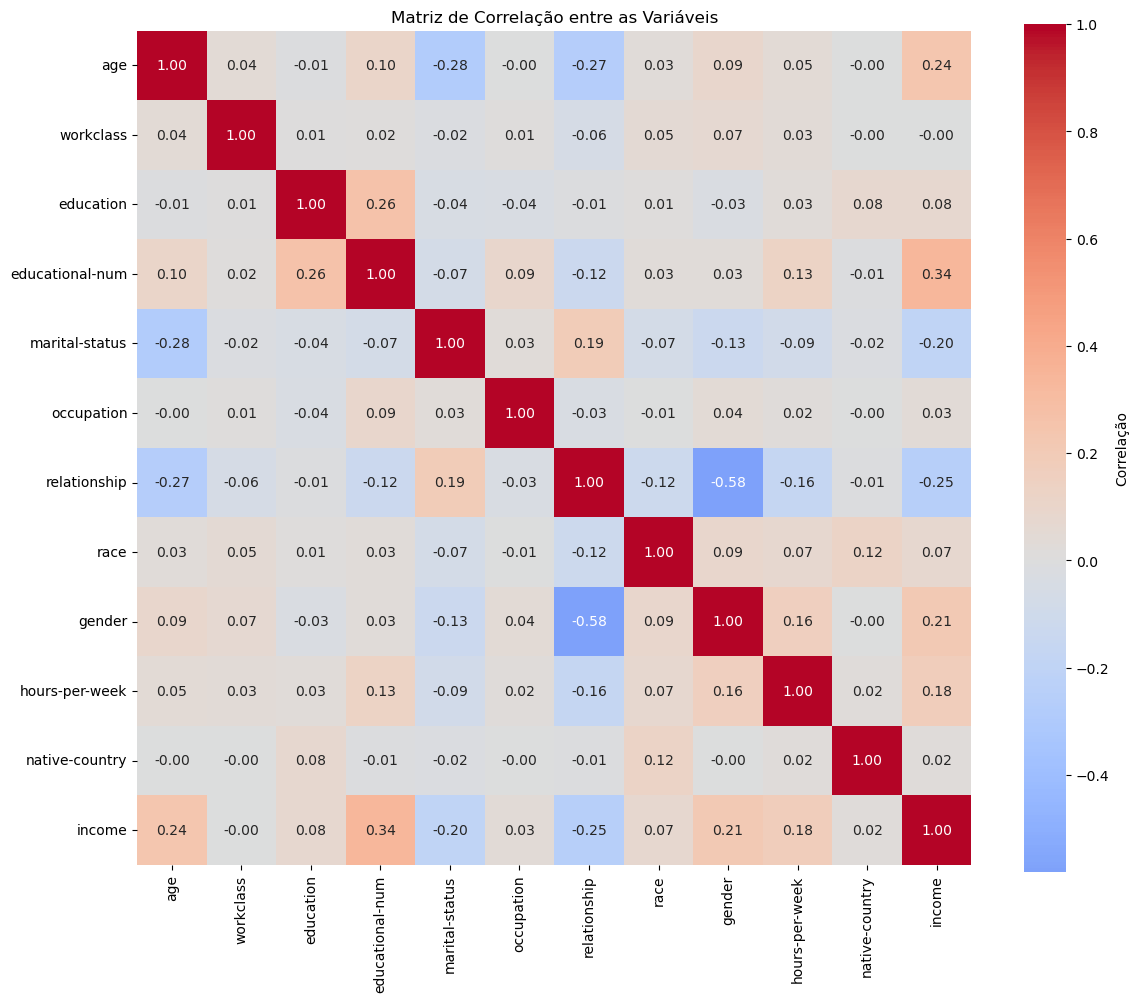

Correlações com a renda:
income             1.000000
educational-num    0.339985
age                0.238385
gender             0.214628
hours-per-week     0.178058
education          0.080091
race               0.070934
occupation         0.032550
native-country     0.020375
workclass         -0.000511
marital-status    -0.199072
relationship      -0.253214
Name: income, dtype: float64


In [110]:
# Calcular a matriz de correlação
correlation_matrix = dataframe.corr()

# Visualizar a matriz de correlação como heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação entre as Variáveis')
plt.tight_layout()
plt.show()

# Mostrar correlações com a variável target (income)
income_correlations = correlation_matrix['income'].sort_values(ascending=False)
print("Correlações com a renda:")
print(income_correlations)

In [111]:
# Filtrar correlações acima de 0.4 em valor absoluto e apenas pares únicos com 'income'
correlacoes_altas = correlation_matrix[correlation_matrix.abs() > 0.2].stack().reset_index()
correlacoes_altas = correlacoes_altas[correlacoes_altas['level_0'] != correlacoes_altas['level_1']]  # Remove auto-correlações
correlacoes_altas = correlacoes_altas[correlacoes_altas[0] != 1]  # Remove correlações perfeitas
correlacoes_altas.columns = ['Variável 1', 'Variável 2', 'Correlação']

# Criar coluna auxiliar para pares únicos
correlacoes_altas['par'] = correlacoes_altas.apply(
    lambda row: tuple(sorted([row['Variável 1'], row['Variável 2']])), axis=1
)

# Filtrar apenas pares únicos que envolvem 'income'
correlacoes_altas_income = correlacoes_altas[
    (correlacoes_altas['Variável 1'] == 'income') | (correlacoes_altas['Variável 2'] == 'income')
]
correlacoes_altas_income = correlacoes_altas_income.drop_duplicates(subset=['par'])
correlacoes_altas_income = correlacoes_altas_income.drop(columns=['par'])
correlacoes_altas_income

,Variável 1,Variável 2,Correlação
3,age,income,0.238385
9,educational-num,income,0.339985
16,relationship,income,-0.253214
20,gender,income,0.214628


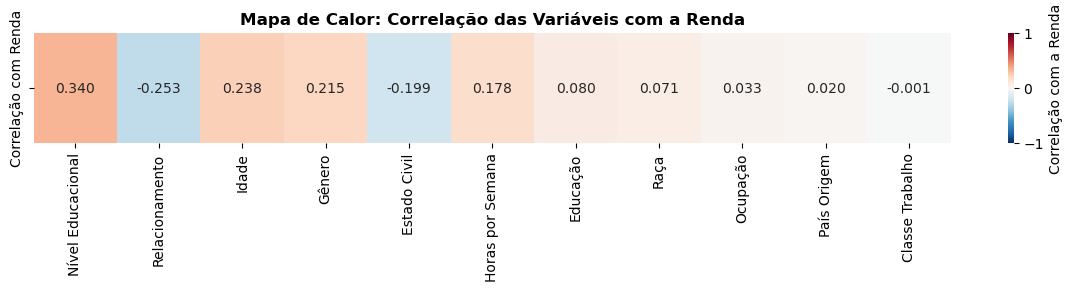

In [112]:
# Heatmap horizontal: correlação apenas com a renda
# Garante a matriz reduzida se ainda não existir
cols_sel = ['age', 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'native-country', 'income']
df_red = dataframe[cols_sel].rename(columns={
    'age': 'Idade',
    'workclass': 'Classe Trabalho',
    'education': 'Educação',
    'educational-num': 'Nível Educacional',
    'marital-status': 'Estado Civil',
    'occupation': 'Ocupação',
    'relationship': 'Relacionamento',
    'race': 'Raça',
    'gender': 'Gênero',
    'hours-per-week': 'Horas por Semana',
    'native-country': 'País Origem',
    'income': 'Renda'
})
correlation_matrix_reduzida = df_red.corr()

# Série com correlação apenas com a renda (removendo auto-correlação)
serie_corr_renda = (correlation_matrix_reduzida['Renda']
                    .drop(index='Renda', errors='ignore')
                    .sort_values(key=lambda s: s.abs(), ascending=False))

# Plot horizontal (linha) com as correlações
plt.figure(figsize=(12, 3))
sns.heatmap(
    serie_corr_renda.to_frame().T,  # Transpor para ficar horizontal
    annot=True, fmt='.3f',
    cmap='RdBu_r', center=0, vmin=-1, vmax=1,  # Escala de -1 a 1
    cbar_kws={'label': 'Correlação com a Renda'},
    xticklabels=serie_corr_renda.index,
    yticklabels=['Correlação com Renda']
)
plt.title('Mapa de Calor: Correlação das Variáveis com a Renda', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## Visualizacão de Dados

**Dataframe Original (`dataframe_original`)**: 
- Mantém valores categóricos originais (ex: 'Male', 'Female')
- Idades em valores reais (17-90 anos)
- Usado para visualizações e interpretação

**Dataframe Processado (`dataframe`)**: 
- Variáveis categóricas codificadas numericamente
- Idade normalizada (0-1)
- Usado para modelos de Machine Learning

In [113]:
# Comparação entre dataframes
print("=== DATAFRAME ORIGINAL ===")
print("Primeiras 3 linhas:")
print(dataframe_original[['age', 'gender', 'education', 'income']].head(3))
print("\n=== DATAFRAME PROCESSADO ===")
print("Primeiras 3 linhas:")
print(dataframe[['age', 'gender', 'education', 'income']].head(3))

print(f"\nIdades originais: {dataframe_original['age'].min()} a {dataframe_original['age'].max()} anos")
print(f"Idades normalizadas: {dataframe['age'].min():.3f} a {dataframe['age'].max():.3f}")

=== DATAFRAME ORIGINAL ===
Primeiras 3 linhas:
   age gender         education income
0   25   Male  Médio Incompleto  <=50K
1   38   Male      Ensino Médio  <=50K
2   28   Male         Tecnólogo   >50K

=== DATAFRAME PROCESSADO ===
Primeiras 3 linhas:
        age  gender  education  income
0  0.131148       1          1       0
1  0.344262       1         11       0
2  0.180328       1          7       1

Idades originais: 17 a 90 anos
Idades normalizadas: 0.000 a 1.000


In [114]:
def grafico_column(name_column):
    # Gráfico de barras mostrando a distribuição usando dados originais para exibição
    plt.figure(figsize=(12, 8))

    # Agrupar dados por coluna e income usando dataframe original
    income_by_column = dataframe_original.groupby([name_column, 'income']).size().unstack(fill_value=0)
 
    # Criar gráfico de barras agrupadas
    ax = income_by_column.plot(kind='bar', width=0.8, figsize=(12, 8))

    # Personalizar o gráfico
    plt.xlabel(name_column, fontsize=12)
    plt.ylabel('Quantidade de Pessoas', fontsize=12)
    plt.title(f'Distribuição de Renda por {name_column}', fontsize=14, fontweight='bold')
    plt.legend(['<=50K', '>50K'], title='Renda', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

<Figure size 1200x800 with 0 Axes>

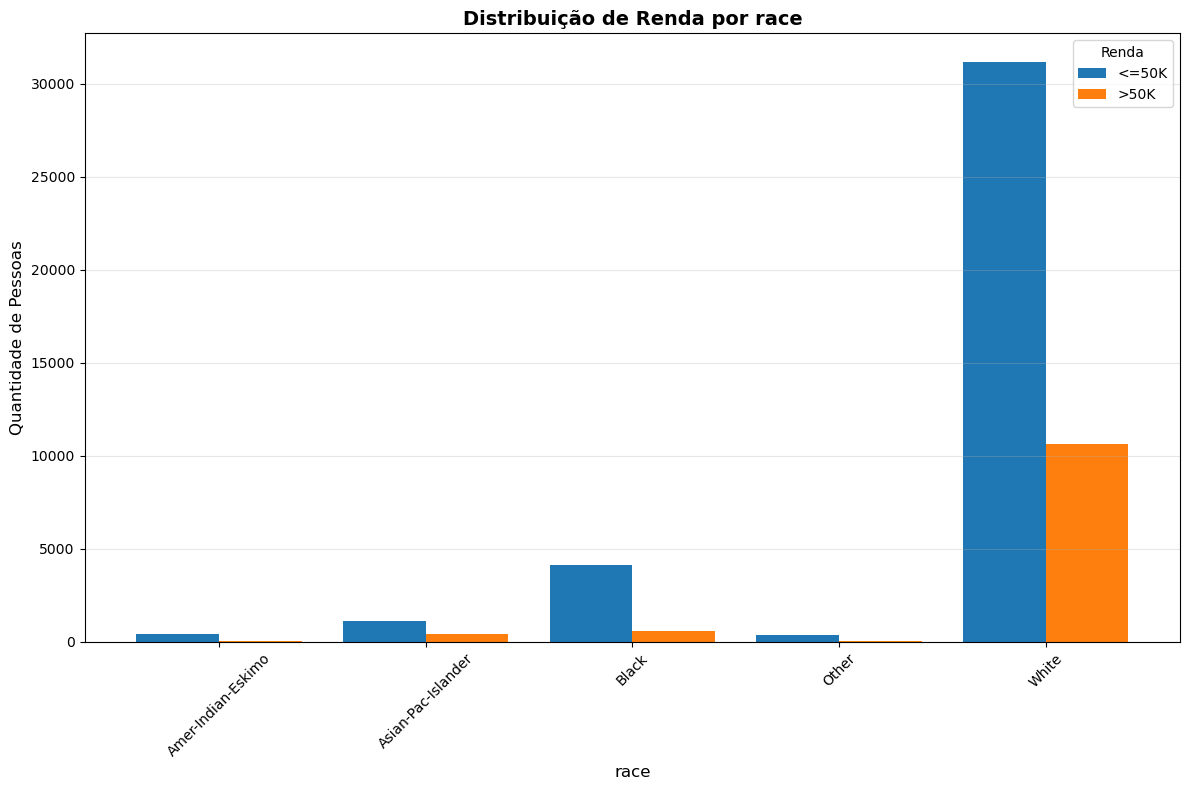

In [115]:
grafico_column('race')

In [116]:
def grafico_linha(x_label_interval, title, column, interval=None):
    plt.figure(figsize=(12, 8))
    
    if interval is None:
        # Usar valores únicos sem intervalos
        unique_values = sorted(dataframe_original[column].unique())
        print(f"Valores únicos em '{column}': {unique_values}")
        # Calcular contagens para cada valor único
        income_50k_counts = []
        income_more_50k_counts = []
        
        for value in unique_values:
            # Filtrar por valor específico
            value_filter = (dataframe_original[column] == value)
            
            # Contar por faixa de renda
            count_50k = len(dataframe_original[value_filter & (dataframe_original['income'] == '<=50K')])
            count_more_50k = len(dataframe_original[value_filter & (dataframe_original['income'] == '>50K')])
            
            income_50k_counts.append(count_50k)
            income_more_50k_counts.append(count_more_50k)
        
        # Plotar as duas linhas
        x_positions = range(len(unique_values))
        plt.plot(x_positions, income_50k_counts, marker='o', linestyle='-', color='red', linewidth=2, label='<=50K')
        plt.plot(x_positions, income_more_50k_counts, marker='s', linestyle='-', color='green', linewidth=2, label='>50K')

        # Adicionar valores nos pontos
        for i, (y1, y2) in enumerate(zip(income_50k_counts, income_more_50k_counts)):
            plt.annotate(f'{y1}', (i, y1), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')
            plt.annotate(f'{y2}', (i, y2), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='green')

        plt.xticks(x_positions, unique_values, rotation=45)
        
    else:
        # Usar intervalos como no código original
        interval_min = dataframe_original[column].min()
        interval_max = dataframe_original[column].max()
        column_intervals = np.arange(interval_min, interval_max + interval, interval)

        # Calcular contagens para cada faixa de renda
        income_50k_counts = []
        income_more_50k_counts = []
        interval_labels = []

        for i in range(len(column_intervals)-1):
            # Filtrar por faixa
            inter_filter = (dataframe_original[column] >= column_intervals[i]) & (dataframe_original[column] < column_intervals[i+1])
            
            # Contar por faixa de renda
            count_50k = len(dataframe_original[inter_filter & (dataframe_original['income'] == '<=50K')])
            count_more_50k = len(dataframe_original[inter_filter & (dataframe_original['income'] == '>50K')])
            
            income_50k_counts.append(count_50k)
            income_more_50k_counts.append(count_more_50k)
            
            # Criar labels dos intervalos
            interval_labels.append(f'{column_intervals[i]}-{column_intervals[i+1]-1}')

        # Plotar as duas linhas
        x_positions = range(len(interval_labels))
        plt.plot(x_positions, income_50k_counts, marker='o', linestyle='-', color='red', linewidth=2, label='<=50K')
        plt.plot(x_positions, income_more_50k_counts, marker='s', linestyle='-', color='green', linewidth=2, label='>50K')

        # Adicionar valores nos pontos
        for i, (y1, y2) in enumerate(zip(income_50k_counts, income_more_50k_counts)):
            plt.annotate(f'{y1}', (i, y1), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')
            plt.annotate(f'{y2}', (i, y2), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='green')

        plt.xticks(x_positions, interval_labels, rotation=45)

    plt.xlabel(x_label_interval, fontsize=12)
    plt.ylabel('Quantidade de Pessoas', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(title='Renda', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Valores únicos em 'race': ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']


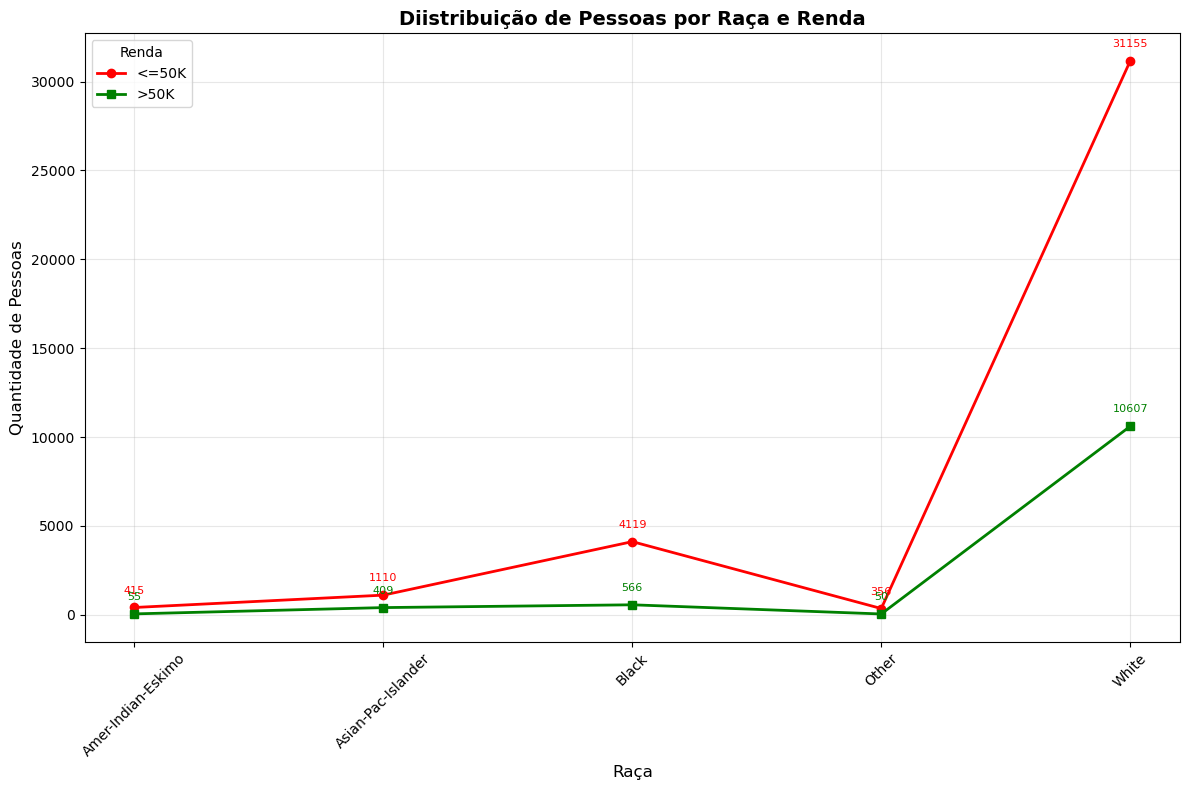

In [118]:
grafico_linha(
    x_label_interval='Raça',
    title='Diistribuição de Pessoas por Raça e Renda',
    column='race'
)

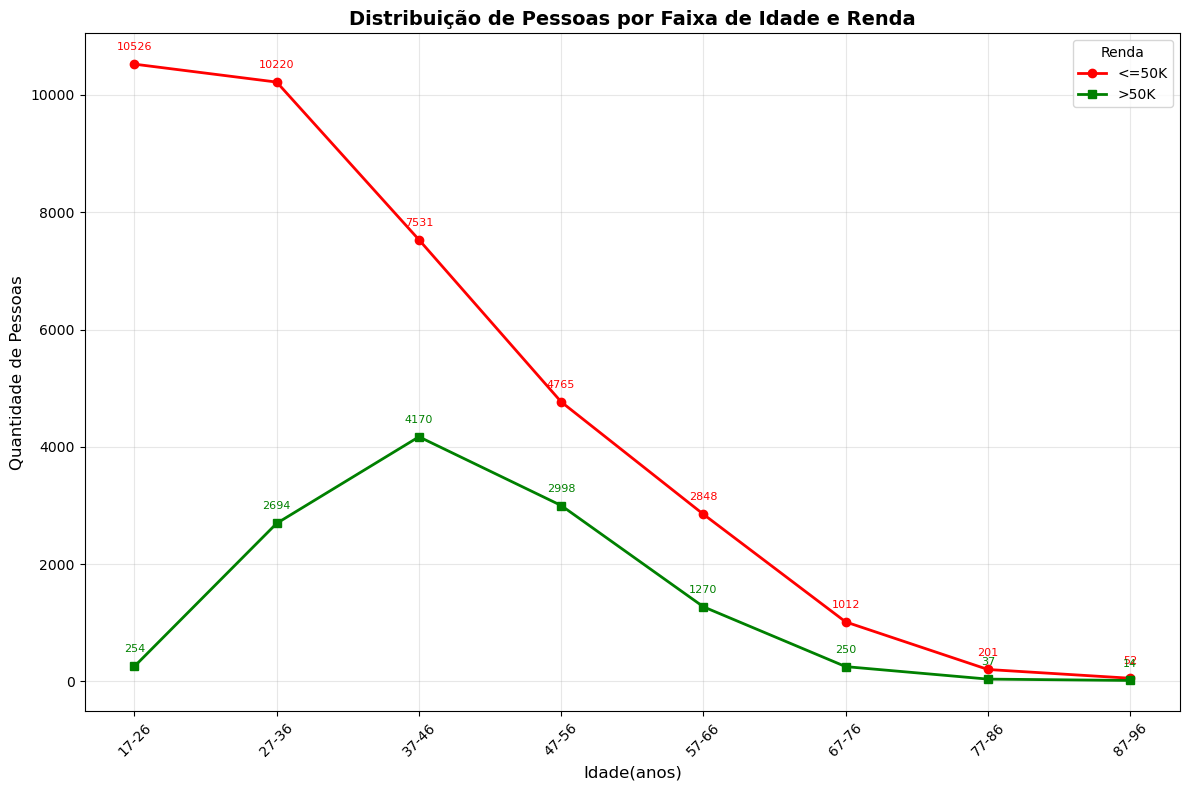

In [ ]:
grafico_linha(
    x_label_interval='Idade(anos)',
    title='Distribuição de Pessoas por Faixa de Idade e Renda',
    column='age',
    interval= 10
)

Valores únicos em 'education': ['Doutorado', 'Ensino Médio', 'Especialização', 'Fundamental Incompleto', 'Mestrado', 'Médio Incompleto', 'Pré-escola', 'Superior Completo', 'Superior Incompleto', 'Tecnólogo']


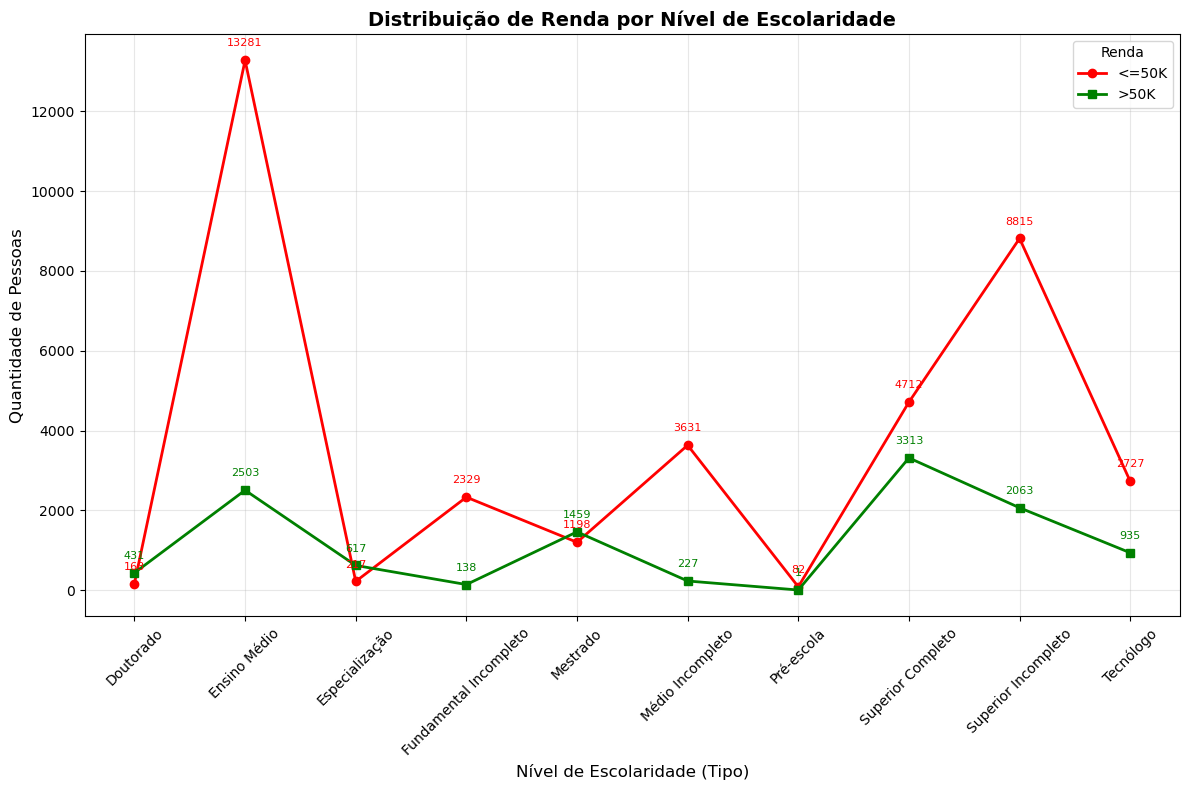

In [ ]:
grafico_linha(
    x_label_interval='Nível de Escolaridade (Tipo)',
    title='Distribuição de Renda por Nível de Escolaridade',
    # column='educational-num',
    column='education',
)

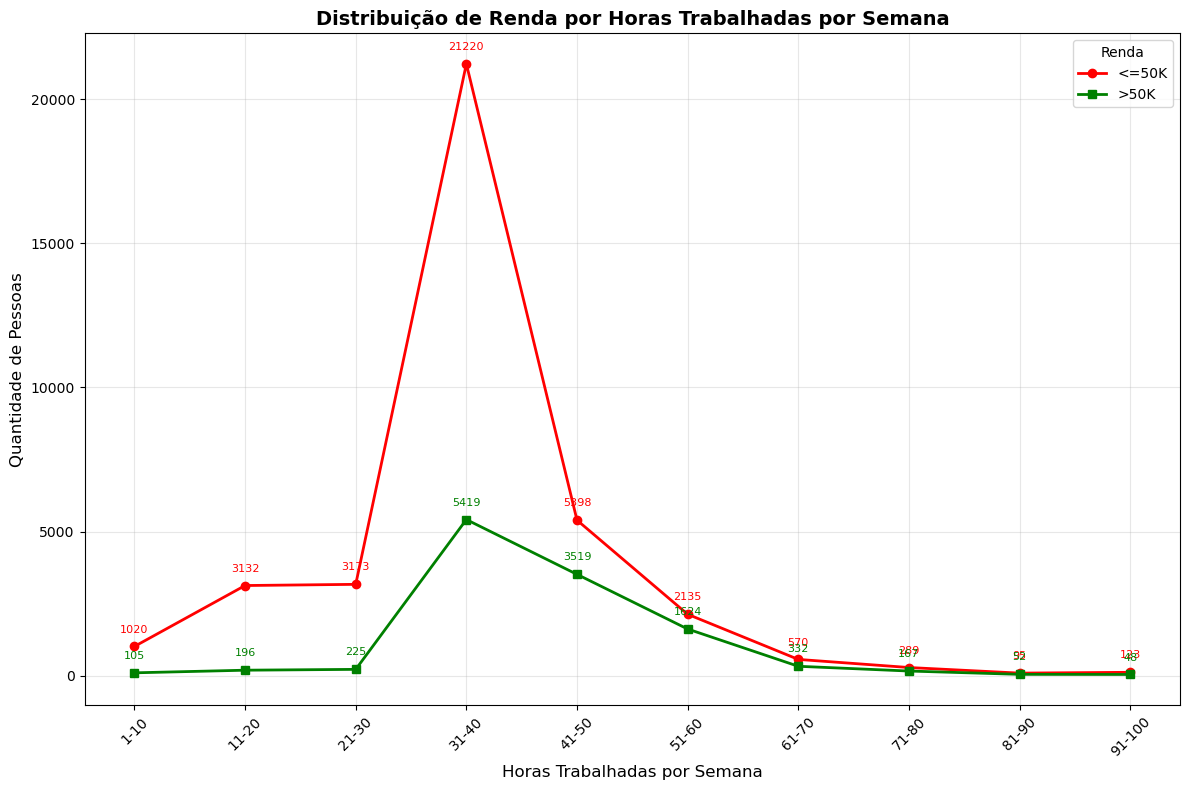

In [ ]:
grafico_linha(
    x_label_interval='Horas Trabalhadas por Semana',
    title='Distribuição de Renda por Horas Trabalhadas por Semana',
    column='hours-per-week',
    interval= 10
)

Valores únicos em 'relationship': ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']


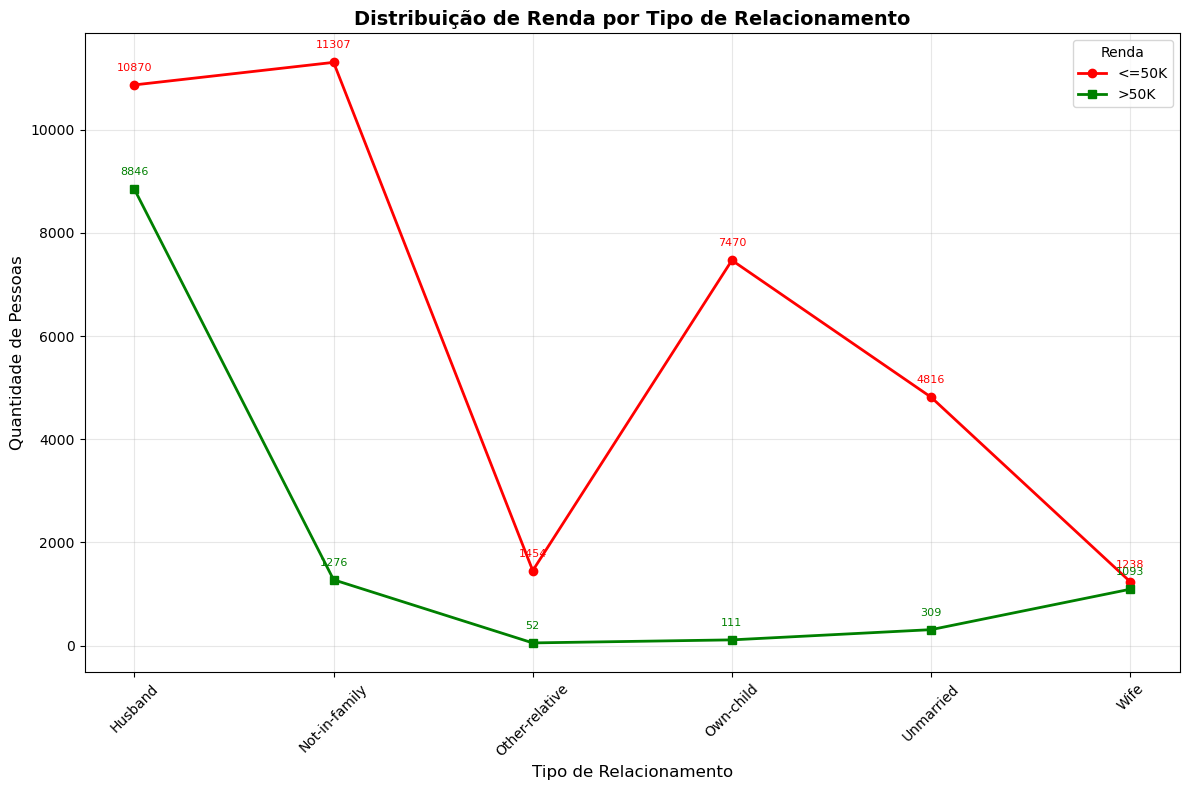

Valores únicos em 'relationship': ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']


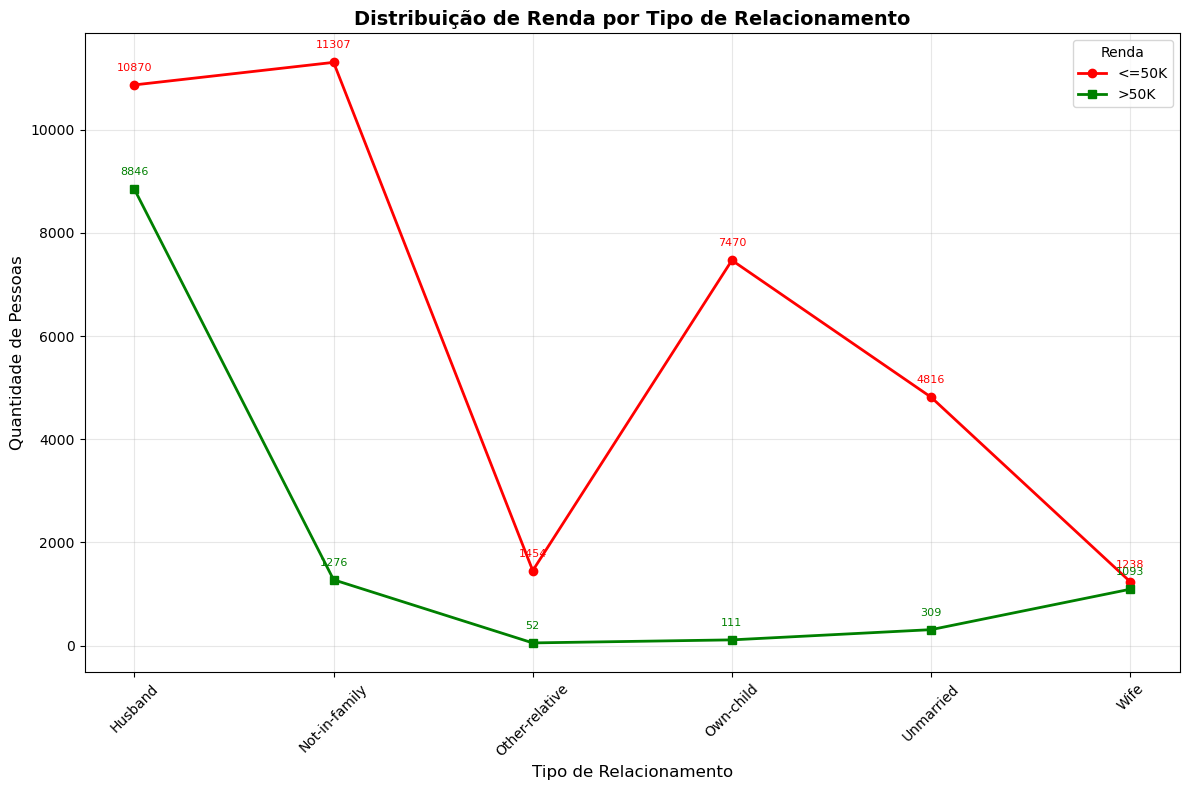

In [119]:
grafico_linha(
    x_label_interval='Tipo de Relacionamento',
    title='Distribuição de Renda por Tipo de Relacionamento',
    column='relationship'
)

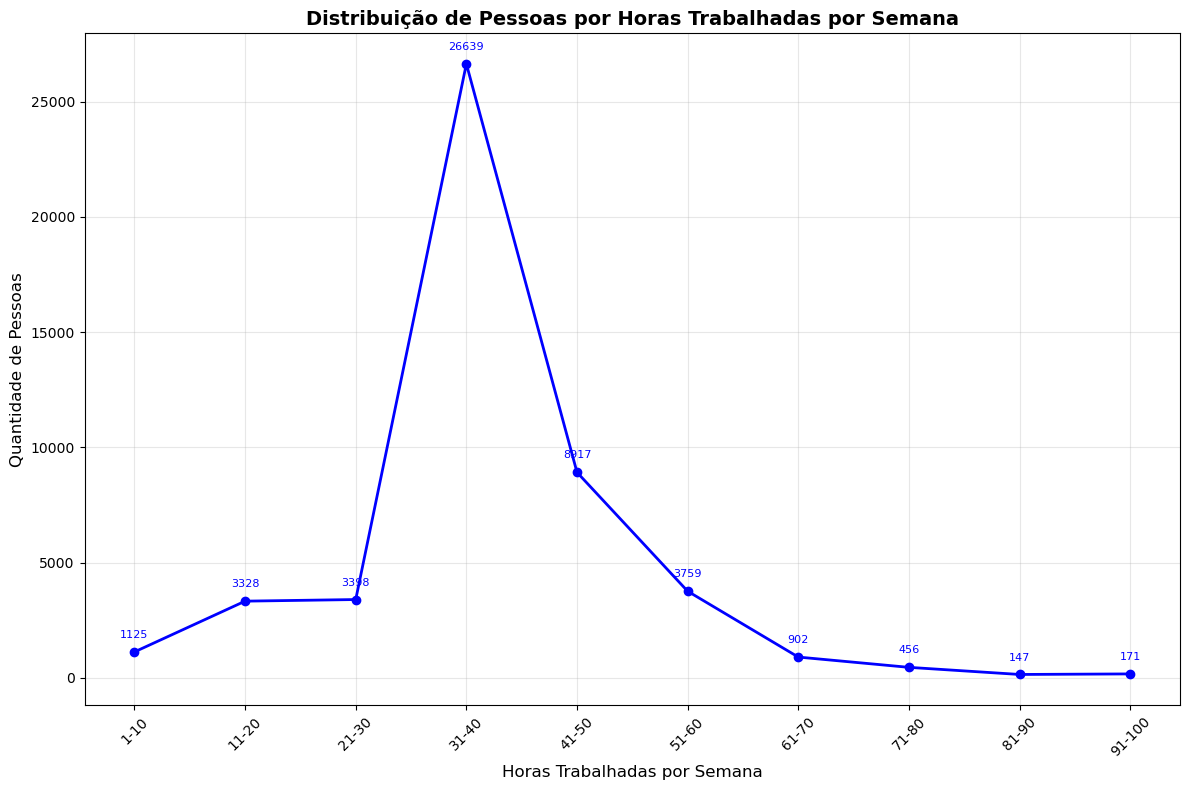

In [120]:
def grafico_linha_sem_renda(column, interval=10, x_label_interval='Horas Trabalhadas por Semana', title='Distribuição de Pessoas por Horas Trabalhadas por Semana'):
    plt.figure(figsize=(12, 8))
    interval_min = dataframe_original[column].min()
    interval_max = dataframe_original[column].max()
    column_intervals = np.arange(interval_min, interval_max + interval, interval)

    counts = []
    interval_labels = []

    for i in range(len(column_intervals)-1):
        inter_filter = (dataframe_original[column] >= column_intervals[i]) & (dataframe_original[column] < column_intervals[i+1])
        count = len(dataframe_original[inter_filter])
        counts.append(count)
        interval_labels.append(f'{column_intervals[i]}-{column_intervals[i+1]-1}')

    x_positions = range(len(interval_labels))
    plt.plot(x_positions, counts, marker='o', linestyle='-', color='blue', linewidth=2, label='Total de Pessoas')

    for i, y in enumerate(counts):
        plt.annotate(f'{y}', (i, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

    plt.xticks(x_positions, interval_labels, rotation=45)
    plt.xlabel(x_label_interval, fontsize=12)
    plt.ylabel('Quantidade de Pessoas', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

grafico_linha_sem_renda('hours-per-week', interval=10)